In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv("credit_risk_dataset.csv")
#df2 = df1.copy()

In [3]:
df1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
df1.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df1.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<Axes: >

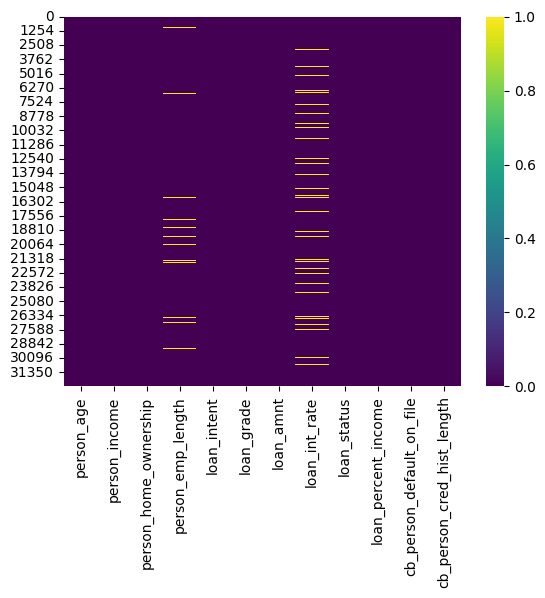

In [7]:
sns.heatmap(df1.isnull(), cmap='viridis')

In [8]:
# drop values that are null
df1.dropna(axis=0,inplace=True)
df1.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [9]:
df1.reset_index(inplace = True)
df1.describe()

,index,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,16292.239472,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,9387.225485,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8159.500000,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16283.500000,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24434.750000,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,32580.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
df1['loan_status'].value_counts()

0    22435
1     6203
Name: loan_status, dtype: int64

In [81]:
model_info = {
    'model_name' : [],
    'accuracy_score' : [],
    'precision_score' : [],
    'recall_score' : [],
    'f1_score' : [],
}
def get_metrics(y_true,y_pred,model_name):
    try:
        if len(y_true) != len(y_pred):
            print("both arrays are not same length")
            return 0
        model_info['model_name'].append(model_name)
        accuracy = accuracy_score(y_true, y_pred)
        print("Accuracy:", accuracy)
        model_info['accuracy_score'].append(accuracy)
        precision = precision_score(y_true, y_pred)
        print("Precision:", precision)
        model_info['precision_score'].append(precision)
        recall = recall_score(y_true, y_pred)
        print("Recall:", recall)
        model_info['recall_score'].append(recall)
        f1 = f1_score(y_true, y_pred)
        print("F1 Score:", f1)
        model_info['f1_score'].append(f1)
    except:
        print("error occured check the input")

In [82]:
df3 = df1.copy()
df3

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28633,32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
28634,32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
28635,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
28636,32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [83]:
categorical_cols = ['person_home_ownership']
encoder = OneHotEncoder(sparse=False)
encoded_cols = encoder.fit_transform(df3[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))
df3 = pd.concat([df3, encoded_df], axis=1)
df3

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0.0,0.0,0.0,1.0
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.0,0.0,1.0,0.0
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1.0,0.0,0.0,0.0
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.0,0.0,0.0,1.0
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28633,32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,1.0,0.0,0.0,0.0
28634,32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,1.0,0.0,0.0,0.0
28635,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,0.0,0.0,0.0,1.0
28636,32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,1.0,0.0,0.0,0.0


In [84]:
categorical_cols = ['loan_intent']
encoder = OneHotEncoder(sparse=False)
encoded_cols = encoder.fit_transform(df3[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))
df3 = pd.concat([df3, encoded_df], axis=1)
df3

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28633,32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28634,32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28635,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
28636,32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [85]:
categorical_cols = ['cb_person_default_on_file']
encoder = OneHotEncoder(sparse=False)
encoded_cols = encoder.fit_transform(df3[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))
df3 = pd.concat([df3, encoded_df], axis=1)
df3

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28633,32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
28634,32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
28635,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28636,32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [86]:
len(df3.columns)

25

In [87]:
x = df3.iloc[0:,[1,2,4,7,8,10,12,13,14,15,16,17,18,19,20,21,22,23,24]]
x

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,0.59,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,21,9600,5.0,1000,11.14,0.10,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,9600,1.0,5500,12.87,0.57,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,23,65500,4.0,35000,15.23,0.53,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,24,54400,8.0,35000,14.27,0.55,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28633,57,53000,1.0,5800,13.16,0.11,30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
28634,54,120000,4.0,17625,7.49,0.15,19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
28635,65,76000,3.0,35000,10.99,0.46,28,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28636,56,150000,5.0,15000,11.48,0.10,26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [88]:
y = df3.iloc[0:,[9]]
y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
28633,0
28634,0
28635,1
28636,0


In [89]:
x_value = x.values
x_value

array([[2.20e+01, 5.90e+04, 1.23e+02, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [2.10e+01, 9.60e+03, 5.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [2.50e+01, 9.60e+03, 1.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       ...,
       [6.50e+01, 7.60e+04, 3.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [5.60e+01, 1.50e+05, 5.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [6.60e+01, 4.20e+04, 2.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00]])

In [90]:
y_value = y.values
y_value = y_value.reshape(len(y_value))
y_value

array([1, 0, 1, ..., 1, 0, 0])

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size=0.3, random_state=33)
len(x_train),len(x_test),len(y_train),len(y_test)

(20046, 8592, 20046, 8592)

In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
get_metrics(y_pred,y_test,'LogisticRegression')

Accuracy: 0.8102886405959032
Precision: 0.17964071856287425
Recall: 0.7284768211920529
F1 Score: 0.28820960698689957


In [93]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
get_metrics(y_pred,y_test,'DecisionTreeClassifier')


Accuracy: 0.8809357541899442
Precision: 0.7457811649428416
Recall: 0.711318795430945
F1 Score: 0.7281424395429179


In [94]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
get_metrics(y_pred,y_test,'RandomForestClassifier')


Accuracy: 0.923766294227188
Precision: 0.6897114861186717
Recall: 0.9371301775147929
F1 Score: 0.7946064597052368


In [95]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
get_metrics(y_pred,y_test,'GradientBoostingClassifier')

Accuracy: 0.9156191806331471
Precision: 0.6575939031028851
Recall: 0.9263803680981595
F1 Score: 0.7691817892390957


In [96]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
get_metrics(y_pred,y_test,'KNeighborsClassifier')


/Users/aruniankur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.8329841713221602
Precision: 0.48557430593358736
Recall: 0.6454413892908828
F1 Score: 0.5542093817955888


In [97]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
get_metrics(y_pred,y_test,'GaussianNB')

Accuracy: 0.8171554934823091
Precision: 0.2422427871529668
Recall: 0.7131410256410257
F1 Score: 0.36164160910199106


In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
get_metrics(y_pred,y_test,'LinearDiscriminantAnalysis')

Accuracy: 0.847648975791434
Precision: 0.46543277082199236
Recall: 0.7233502538071066
F1 Score: 0.5664127194435243


In [99]:
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# model = QuadraticDiscriminantAnalysis()
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# get_metrics(y_pred,y_test,'QuadraticDiscriminantAnalysis')


In [100]:
import xgboost as xgb

model = xgb.XGBClassifier(
    max_depth=3,
    learning_rate=0.05,
    n_estimators=500,
    objective='binary:logistic'
)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
get_metrics(y_pred,y_test,'xgb_type1')

Accuracy: 0.9250465549348231
Precision: 0.6815459989112683
Recall: 0.9549961861174676
F1 Score: 0.795425667090216


In [101]:
import xgboost as xgb

model = xgb.XGBClassifier(
    max_depth=10,
    learning_rate=0.1,
    n_estimators=1000,
    objective='binary:logistic'
)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
get_metrics(y_pred,y_test,'xgb_type2')

Accuracy: 0.9328445065176909
Precision: 0.7425149700598802
Recall: 0.9291553133514986
F1 Score: 0.8254160363086233


In [103]:
import xgboost as xgb

model = xgb.XGBClassifier(
    max_depth=7,
    learning_rate=0.1,
    n_estimators=3000,
    objective='binary:logistic'
)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
get_metrics(y_pred,y_test,'xgb_type3')

Accuracy: 0.9297020484171322
Precision: 0.7446924333151878
Recall: 0.9101796407185628
F1 Score: 0.8191616766467066


In [105]:
import xgboost as xgb

model = xgb.XGBClassifier(
    max_depth=14,
    learning_rate=0.1,
    n_estimators=3000,
    objective='binary:logistic'
)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
get_metrics(y_pred,y_test,'xgb_type4')

Accuracy: 0.92981843575419
Precision: 0.7403375068045727
Recall: 0.9152086137281292
F1 Score: 0.8185374661450497


In [74]:
# import lightgbm as lgb

# model = lgb.LGBMClassifier()
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# get_metrics(y_pred,y_test)

In [106]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
get_metrics(y_pred,y_test,'CatBoostClassifier')

Learning rate set to 0.03706
0:	learn: 0.6557570	total: 4.74ms	remaining: 4.73s
1:	learn: 0.6227335	total: 9.02ms	remaining: 4.5s
2:	learn: 0.5967456	total: 13.3ms	remaining: 4.42s
3:	learn: 0.5679583	total: 17.6ms	remaining: 4.38s
4:	learn: 0.5423103	total: 22.5ms	remaining: 4.48s
5:	learn: 0.5217776	total: 27ms	remaining: 4.47s
6:	learn: 0.4988003	total: 31.5ms	remaining: 4.46s
7:	learn: 0.4796682	total: 36.1ms	remaining: 4.47s
8:	learn: 0.4625921	total: 40.7ms	remaining: 4.48s
9:	learn: 0.4472894	total: 44.9ms	remaining: 4.45s
10:	learn: 0.4327437	total: 50.1ms	remaining: 4.51s
11:	learn: 0.4187971	total: 55ms	remaining: 4.53s
12:	learn: 0.4079948	total: 59.1ms	remaining: 4.49s
13:	learn: 0.3961569	total: 63.2ms	remaining: 4.45s
14:	learn: 0.3871067	total: 67.8ms	remaining: 4.45s
15:	learn: 0.3788241	total: 72.9ms	remaining: 4.48s
16:	learn: 0.3720108	total: 77.3ms	remaining: 4.47s
17:	learn: 0.3652154	total: 81.6ms	remaining: 4.45s
18:	learn: 0.3580111	total: 86.4ms	remaining: 4.46

In [107]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
get_metrics(y_pred,y_test,'AdaBoostClassifier')

Accuracy: 0.8796554934823091
Precision: 0.5971692977681001
Recall: 0.7886412652767792
F1 Score: 0.6796778190830235


In [108]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
get_metrics(y_pred,y_test,'RidgeClassifier')

Accuracy: 0.8439245810055865
Precision: 0.37561241154055525
Recall: 0.7805429864253394
F1 Score: 0.5071664829106947


In [109]:
# from sklearn.naive_bayes import RandomizedNB

# model = RandomizedNB()
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# get_metrics(y_pred,y_test)

In [110]:
# from sklearn.neural_network import MLPClassifier

# model = MLPClassifier()
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# get_metrics(y_pred,y_test,'MLPClassifier')

In [111]:
df_model = pd.DataFrame(model_info)
df_model

,model_name,accuracy_score,precision_score,recall_score,f1_score
0,LogisticRegression,0.810289,0.179641,0.728477,0.288210
1,DecisionTreeClassifier,0.880936,0.745781,0.711319,0.728142
2,RandomForestClassifier,0.923766,0.689711,0.937130,0.794606
3,GradientBoostingClassifier,0.915619,0.657594,0.926380,0.769182
4,KNeighborsClassifier,0.832984,0.485574,0.645441,0.554209
5,GaussianNB,0.817155,0.242243,0.713141,0.361642
6,LinearDiscriminantAnalysis,0.847649,0.465433,0.723350,0.566413
7,xgb_type1,0.925047,0.681546,0.954996,0.795426
8,xgb_type2,0.932845,0.742515,0.929155,0.825416
9,xgb_type3,0.929702,0.744692,0.910180,0.819162
